<a href="https://colab.research.google.com/github/lanarich/additional_ML_DL-/blob/main/HW1_MLDL_RecSys_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание: рекомендательные системы

В этом домашнем задании будем работать с данными о пользователях и оценках, которые они поставили различным фильмам.

На основе этих данных будем рекомендовать пользователям к просмотру новые для них фильмы.

* За решение всех пунктов из домашнего задания можно получить 11 баллов максимум.
* В ведомость курса ставится балл, равный **min(ваш набранный балл, 10)**.

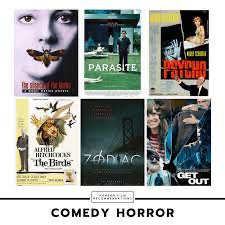

В домашней работе вы примените как базовые методы для построения рекомендаций, так и Deep Learning подходы.

Базово выполнения этой работы вам будут полезны:

* [Семинар с курса по ML в нашей магистратуре](https://github.com/Murcha1990/MLDS_ML_2022/blob/main/Занятие_13_Recsys1/MLHS_Recsys_1.ipynb)
* [Ноутбук из урока на Stepik](https://colab.research.google.com/drive/1RirfhDfR_ZAb_S6UhP-F2TBtL9eNX9VG)

(по сути это один и тот же код, но немного в разном оформлении).

Для выполнения Deep Learning-части пригодятся дополнительные материалы, ссылки на которые вы найдете в нижней части ноутбука.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from typing import List, Dict
from tqdm import tqdm, tqdm_notebook

## 0. Загрузка и обработка данных

Загрузим данные.

In [2]:
ratings = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/movies_ratings.csv')

In [3]:
ratings

,userId,movieId,rating,timestamp,title
0,1,31,2.5,1260759144,Dangerous Minds
1,7,31,3.0,851868750,Dangerous Minds
2,31,31,4.0,1273541953,Dangerous Minds
3,32,31,4.0,834828440,Dangerous Minds
4,36,31,3.0,847057202,Dangerous Minds
...,...,...,...,...,...
99845,664,64997,2.5,1343761859,H.G. Wells' War of the Worlds
99846,664,72380,3.5,1344435977,The Box
99847,665,129,3.0,995232528,Pie in the Sky
99848,665,4736,1.0,1010197684,Summer Catch


In [4]:
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

ratings['userId'] = user_encoder.fit_transform(ratings['userId'])
ratings['movieId'] = item_encoder.fit_transform(ratings['movieId'])

num_users, num_movies = ratings.userId.nunique(), ratings.movieId.nunique()
num_users, num_movies

(671, 9025)

In [5]:
ratings

,userId,movieId,rating,timestamp,title
0,0,30,2.5,1260759144,Dangerous Minds
1,6,30,3.0,851868750,Dangerous Minds
2,30,30,4.0,1273541953,Dangerous Minds
3,31,30,4.0,834828440,Dangerous Minds
4,35,30,3.0,847057202,Dangerous Minds
...,...,...,...,...,...
99845,663,7082,2.5,1343761859,H.G. Wells' War of the Worlds
99846,663,7337,3.5,1344435977,The Box
99847,664,115,3.0,995232528,Pie in the Sky
99848,664,3704,1.0,1010197684,Summer Catch


Поделим выборку на train и test так, чтобы у каждого пользователя последние 10 фильмов оказались в тесте для подсчета метрики качества рекомендаций k=10.  

In [6]:
train, test = [], []
num_test_samples = 10

for user, data in ratings.groupby('userId'):
    train += [data[:-num_test_samples]]
    test += [data[-num_test_samples:]]

train = pd.concat(train)
test = pd.concat(test)
print(train.shape, test.shape)

(93140, 5) (6710, 5)


In [7]:
train.head()

,userId,movieId,rating,timestamp,title
0,0,30,2.5,1260759144,Dangerous Minds
42,0,830,3.0,1260759179,Dumbo
84,0,856,3.0,1260759182,Sleepers
117,0,903,2.0,1260759185,Escape from New York
165,0,927,4.0,1260759205,Cinema Paradiso


Запишите данные в формате, где строка соответствует пользователю, а столбцы будут истинными метками и предсказаниями в виде списков.

Назовите полученную таблицу `interactions`, действуйте по аналогии или воспользуйтесь кодом из семинара по ML.

In [ ]:
# your code here

Для оценки качества модели будем использовать метрику  precision@10 для каждого пользователя (доля угаданных рекомендаций). Усредним ее по всем пользователям (полученная метрика называется MAP@10).

In [ ]:
def calc_precision(column):
    return (
        interactions
        .apply(
            lambda row:
            len(set(row['true_test']).intersection(
                set(row[column]))) /
            min(len(row['true_test']) + 0.001, 10.0),
            axis=1)).mean()

# 1. Коллаборативная фильтрация (2 балла)

Составьте матрицу "оценок" пользователей - `ratings`. Нули будут обозначать отсутствие взаимодействия **(0.25 балла)**.

Действуйте по аналогии или воспользуйтесь кодом из семинара по ML.

In [ ]:
# your code here

In [ ]:
ratings_m = ratings.values

Посчитайте схожести пользователей (запишите их в np.array `similarity_users`) с помощью корреляции Пирсона. Для каждой пары учитывайте только ненулевые значения **(0.5 балла)**.

Действуйте по аналогии или воспользуйтесь кодом из урока.

In [ ]:
# your code here

Сделайте user-based прогнозы по тому же правилу, что и в уроке **(1 балл)**:

Для каждого пользователя:

1. Найдём пользователей с похожестью больше $\alpha$ на нашего пользователя.
2. Посчитаем для каждого фильма долю пользователей (среди выделенных на первом шаге), которые взаимодействовали с этим фильмом.
3. Порекомендуем фильмы с наибольшими долями со второго шага (среди тех, которые пользователь ещё не видел).

В нашем примере данных не очень много, поэтому возьмём $\alpha = 0$.

Сделайте предсказания и запишите их в столбец
`prediction_user_based` таблицы `interactions`.

In [ ]:
# your code here

Посчитайте значение метрики MAP@10 для user-based подхода **(0.25 балла)**.

In [ ]:
# your code here

## 2. SVD-разложение (2 балла)

Для выполнения заданий при необходимости заглядывайте в ноутбук из семинара по ML.

Сделайте сингулярное разложение (svd в scipy.linalg), на выходе вы получите три матрицы - `U`,`sigma`,`V` **(0.5 балла)**.

In [ ]:
from scipy.sparse.linalg import svd

In [ ]:
# your code here

Значения у матрицы с сингулярными числами отсортированы по убыванию.

Оставьте только первые 150 компонент, чтобы получить скрытые представления размерности 150 **(0.5 балла)**.

Для этого необходимо оставить 150 столбцов в матрице U, оставить из sigma только первые 150 значений (и сделать из них диагональную матрицу) и 150 столбцов в матрице V. Перемножим преобразованные матрицы ($\hat{U}, \hat{sigma}, \hat{V^T}$), чтобы получить восстановленную матрицу оценок.

In [ ]:
# your code here

Посчитайте качество аппроксимации матрицы по норме Фробениуса (среднеквадратичную ошибку между всеми элементами соответствующими элементами двух матриц). Сравните его с простым бейзлайном с константным значением, равным среднему значению исходной матрицы. У аппроксимации ошибка должна получиться ниже **(0.25 балла)**.

In [ ]:
# your code here

Теперь сделайте предсказания по матрице (не забывайте про то, что уже было просмотрено пользователем) **(0.5 балла)**.

Для этого необходимо для каждого пользователя найти предметы с наибольшими оценками в восстановленной матрице.

In [ ]:
# your code here

Посчитайте значение метрики MAP@10 для SVD-подхода **(0.25 балла)**.

In [ ]:
# your code here

# 3. Градиентный Бустинг / Библиотека CatBoost (1.5 балла)

В задаче рекомендаций так же можно использовать метод градиентного бустинга. Мы будем использовать библиотеку `CatBoost`. Для предсказаний мы будем использовать векторы после SVD разложения, которые будут показывать информацию о пользователе или фильме. На выход у нас будет оценка пользователя фильма.

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor
from scipy.linalg import svd
from sklearn.metrics import mean_squared_error

Сделайте снова SVD разложение и возьмите матрицу `U`, строки которой репрезентуют юзеров, и матрицу `V`, столбцы которой репрезентуют фильмы. Обрежьте эти матрицы так, чтобы и юзеры, и фильмы у нас описывались векторами размерности `50` **(0.25 балла)**.

In [ ]:
# your code here

Сконкатенируйте векторы пользователей и векторы фильмов и сбалансируйте выборку, чтобы семплов с нулевым рейтингом не было намного больше, чем семплов с не нулевым **(0.5 балла)**.

In [ ]:
# your code here

Обучите модель градиентного бустинга **(0.25 балла)**.

In [ ]:
# your code here

Предскажите для каждого пользователя подходящие ему фильмы **(0.25 балла)**.

In [ ]:
# your code here

Посчитайте значение метрики MAP@10 для подхода с градиентным бустингом **(0.25 балла)**.

In [ ]:
# your code here

# 4. Автокодировщики (2.5 балла)

Здесь вам придется немного разобраться самостоятельно.
В [этом ноутбуке](https://colab.research.google.com/drive/1smDjB-N6ChUHve1S9bLXoeZefFp4m3iZ?usp=sharing) есть пример обучения автокодировщика для построения рекомендаций.

В этом задании обучите автокодировщик по образу и подобию того, что сделано в ноутбуке.

Удалось ли с помощью данного DL-подхода превзойти качество рекомендаций, полученных ML-методами?

In [ ]:
# your code here

# 5. Другие методы DL* (3 балла)

*Этот пункт со звездочкой, потому что потребует от вас действительно вникнуть в DL-подходы для построения рекомендательных систем.*

Реализуйте более сложные DL-подходы для построения рекомендаций: DSSM и/или NCF. Также вы можете попробовать что-то другое.

Вы можете пользоваться кодом из этих ноутбуков:
* [ноутбук с NCF-моделью](https://colab.research.google.com/drive/1rPL4Tkw_QaXmxDIPOflr1mRfW1VyoHsm?usp=sharing)

* [ноутбук с DSSМ-моделью](https://colab.research.google.com/drive/1KRJv2tlFjIbmO6sKcJo-M447O108JYd_?usp=sharing)

Вы не ограничены в способе реализации и применения подходов, а также в признаках, на которых обучаете модели.

**За каждый корректно реализованный подход - 1.5 балла (но не более 3 баллов за задание).**

In [ ]:
# your code here